Abstract:

Este dataset contiene toda la información recabada en 10 temporadas sobre todos los partidos que se disputaron de la premier league de Inglaterra durante 10 temporadas, siendo la misma bastante amplia, en la misma se detallan resultados, resultados parciales, tiros al arco, pases y más información. Consta de 4050 filas y 114 columnas, con la mayoría de sus variables numéricos lo cual facilita el análisis.

La idea en que se basará este trabajo será poder generar un modelo capaz de predecir los porcentajes de victoria para cada equipo en base a la información retrospectiva.
Para esta tercera entrega, a partir de los gráficos se intentará obtener cuales son las características principales de los equipos que obtienen una victoria, procurar visualizar que variables son las más influyentes y cuáles menos en el resultado final, de modo de tenerlas identificadas para ayudar en el trabajo final.

Primer análisis:
La hipótesis en que se basará el primer análisis es sobre la base de que la localía tiene un peso relativo a la hora de la victoria, para ello se generarán cifras y gráficos donde poder sacar algunas conclusiones sobre este ítem.

Segundo análisis:
En este apartado se buscará encontrar una relación entre la cantidad de llegadas y goles, poder ver si los equipos que generan más situaciones de peligro son los que más ganan o los que mejores resultados obtienen son los que demuestran mayor efectividad.

Tercer análisis:
Visualización de otros factores de victoria, posesión,cantidad de pases, violencia en el juego( faltas cometidas, rojas, amarillas).






Contexto comercial:

Actualmente en el mercado existen muchas empresas de apuestas deportivas que precisan tener modelos predictivos precisos en los cuáles estimar los porcentajes de victoria, derrota, empate y demas items de diversos juegos deportivos, con los mismos las empresas asignan valores de ganancia a los distintos resultados y dependiendo de lo precisos que sean asignan un valor de ganancia por parte del apostante. Estas empresas generan ganancias o perdidas en base al acierto o fracaso de la persona que apuesta, en los casos de fracaso gana la empresa, en los casos de acierto gana el apostante.

Problema comercial:

¿Es posible predecir de forma precisa un resultado deportivo?
    

Contexto análitivo:

Tenemos la base de resultados deportivos junto con todas las variales referentes a cada partido de la premier league durante 10 temporadas, la idea es generar un modelo capaz de predecir cuál es el resultado más probable en base a lo acontecido en partidos anteriores, esto nos lleva a tener que utilizar un modelo de aprendizaje supervizado en principio, dado que precisamos orientar los resultados del análisis a casuisticas muy precisas. De todas formas un modelo del estilo Clustering(aunque sea no supervisado) puede servir para darnos los primeros indicios e identificar que es lo que hace parecerse a los equipos, incorporando nuevos items al análisis.

Objetivo:

Generar un modelo de predicción de victoria en base al dataset actual.
    

In [1]:
! pip install bqplot
! pip install pingouin

In [2]:
! pip install chart_studio

In [94]:
#Analisis exploratorio con interpretación de los gráficos
import pandas as pd
import numpy as np
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import chart_studio.plotly     as py

In [4]:
pl= pd.read_csv('premierleague.csv')

In [13]:
pl.shape

(4070, 114)

In [14]:
pl.dtypes

Unnamed: 0                    int64
link_match                   object
season                       object
date                         object
home_team                    object
                             ...   
sg_match_ft_acum_away       float64
goals_scored_ht_avg_away    float64
goals_conced_ht_avg_away    float64
sg_match_ht_acum_away       float64
performance_acum_away       float64
Length: 114, dtype: object

In [15]:
pl.head(10)

,Unnamed: 0,link_match,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,...,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away
0,0,https://www.premierleague.com/match/7186,10/11,2010-11-01,Blackpool,West Bromwich Albion,2-1,1-0,15.0,8.0,...,20.0,584.9,1.6,1.44,1.67,-2.0,0.33,0.78,-4.0,55.6
1,1,https://www.premierleague.com/match/7404,10/11,2011-04-11,Liverpool,Manchester City,3-0,3-0,16.0,6.0,...,22.0,681.4,2.0,1.61,0.87,23.0,0.87,0.32,17.0,60.2
2,2,https://www.premierleague.com/match/7255,10/11,2010-12-13,Manchester United,Arsenal,1-0,1-0,26.0,5.0,...,21.2,748.0,1.8,2.12,1.12,16.0,0.94,0.38,9.0,66.7
3,3,https://www.premierleague.com/match/7126,10/11,2010-09-13,Stoke City,Aston Villa,2-1,0-1,26.0,8.0,...,25.0,567.3,2.0,1.33,2.00,-2.0,1.00,1.00,0.0,66.7
4,4,https://www.premierleague.com/match/7350,10/11,2011-02-14,Fulham,Chelsea,0-0,0-0,50.0,4.0,...,19.4,728.6,1.4,1.84,0.88,24.0,0.84,0.48,9.0,58.7
5,5,https://www.premierleague.com/match/7096,10/11,2010-08-16,Manchester United,Newcastle United,3-0,2-0,15.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,https://www.premierleague.com/match/7166,10/11,2010-10-18,Blackburn Rovers,Sunderland,0-0,0-0,30.0,5.0,...,22.0,554.3,1.4,1.00,1.00,0.0,0.29,0.29,0.0,38.1
7,7,https://www.premierleague.com/match/7258,10/11,2010-12-20,Manchester City,Everton,1-2,0-2,9.0,10.0,...,21.4,630.5,1.3,1.06,1.18,-2.0,0.41,0.65,-4.0,35.3
8,8,https://www.premierleague.com/match/7226,10/11,2010-11-22,Sunderland,Everton,2-2,1-1,44.0,4.0,...,19.8,638.8,1.0,1.08,1.00,1.0,0.38,0.54,-2.0,38.5
9,9,https://www.premierleague.com/match/7106,10/11,2010-08-23,Manchester City,Liverpool,3-0,1-0,24.0,5.0,...,30.0,531.0,1.0,1.00,1.00,0.0,0.00,0.00,0.0,33.3


In [9]:
pl['resultado']= ''
pl.loc[pl['goal_home_ft']>pl['goal_away_ft'],'resultado']= 'Victoria_local'
pl.loc[pl['goal_home_ft']<pl['goal_away_ft'],'resultado']= 'Derrota_local'
pl.loc[pl['goal_home_ft']==pl['goal_away_ft'],'resultado']= 'Empate'

pl['resultado']

      

0       Victoria_local
1       Victoria_local
2       Victoria_local
3       Victoria_local
4               Empate
             ...      
4065     Derrota_local
4066            Empate
4067            Empate
4068    Victoria_local
4069            Empate
Name: resultado, Length: 4070, dtype: object

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
resultados =pl['resultado'].value_counts()
resultados

Victoria local        1835
Victoria visitante    1235
Empate                1000
Name: resultado, dtype: int64

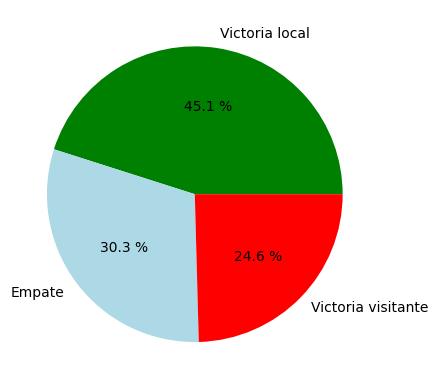

In [19]:
etiquetas_resultado= pl['resultado'].unique()
colors=["green","lightblue","red"]
plt.pie(resultados,labels=etiquetas_resultado,autopct="%0.1f %%", colors=colors)
plt.show()



Interpretación del grafico:
El resultado que mayor cantidad de veces se da en la muestra es la victorial del local, mientras que el menos veces ocurre es la victoria del visitante. El local tiene una ventaja relativa sobre el visitante a la hora de conseguir un resultado positivo, en el 75.1 porciento de los casos el local se lleva al menos un punto, en cuanto el visitante lo hace en el 54,7 de los casos.

In [8]:
pl['resultado_parcial']= ''
pl.loc[pl['goal_home_ht']>pl['goal_away_ht'],'resultado_parcial']= 'Victoria_local_parcial'
pl.loc[pl['goal_home_ht']<pl['goal_away_ht'],'resultado_parcial']= 'derrota_local_parcial'
pl.loc[pl['goal_home_ht']==pl['goal_away_ht'],'resultado_parcial']= 'Empate_parcial'

pl['resultado_parcial']

0       Victoria_local_parcial
1       Victoria_local_parcial
2       Victoria_local_parcial
3        derrota_local_parcial
4               Empate_parcial
                 ...          
4065            Empate_parcial
4066            Empate_parcial
4067            Empate_parcial
4068    Victoria_local_parcial
4069            Empate_parcial
Name: resultado_parcial, Length: 4070, dtype: object

In [10]:
final_parcial= pl[["resultado","resultado_parcial"]]
final_parcial


,resultado,resultado_parcial
0,Victoria_local,Victoria_local_parcial
1,Victoria_local,Victoria_local_parcial
2,Victoria_local,Victoria_local_parcial
3,Victoria_local,derrota_local_parcial
4,Empate,Empate_parcial
...,...,...
4065,Derrota_local,Empate_parcial
4066,Empate,Empate_parcial
4067,Empate,Empate_parcial
4068,Victoria_local,Victoria_local_parcial


In [11]:
resultado_parcial= final_parcial.set_index("resultado_parcial")
print(resultado_parcial)


                             resultado
resultado_parcial                     
Victoria_local_parcial  Victoria_local
Victoria_local_parcial  Victoria_local
Victoria_local_parcial  Victoria_local
derrota_local_parcial   Victoria_local
Empate_parcial                  Empate
...                                ...
Empate_parcial           Derrota_local
Empate_parcial                  Empate
Empate_parcial                  Empate
Victoria_local_parcial  Victoria_local
Empate_parcial                  Empate

[4070 rows x 1 columns]


In [109]:
visloc=resultado_parcial.loc[["Victoria local parcial","Victoria visitante parcial"]]
print(visloc)

                                     resultado
resultado_parcial                             
Victoria local parcial          Victoria local
Victoria local parcial          Victoria local
Victoria local parcial          Victoria local
Victoria local parcial          Victoria local
Victoria local parcial          Victoria local
...                                        ...
Victoria visitante parcial      Victoria local
Victoria visitante parcial  Victoria visitante
Victoria visitante parcial  Victoria visitante
Victoria visitante parcial  Victoria visitante
Victoria visitante parcial  Victoria visitante

[2398 rows x 1 columns]


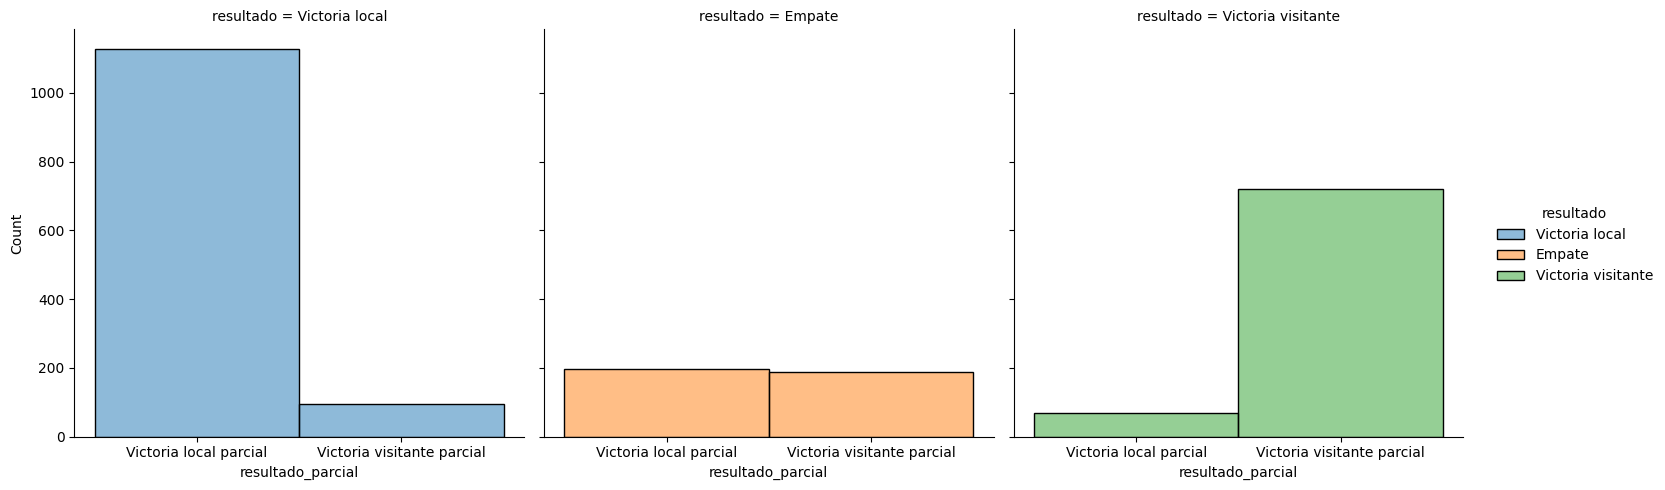

In [129]:
sns.displot(data=visloc, x="resultado_parcial",hue="resultado",col="resultado")
plt.show()

Este gráfico agrupado sirve para ver la ventaja relativa que tiene el local sobre el visitante si se va al descanso ganando, el visitante gana menos partidos que el local si se va al descanso ganando el partido, la teoría es que la localía tiene un peso relativo sobre la posible victoria, lo cual condice con el gráfico anterior.

In [5]:
local_goles_tiros= pl[["goal_home_ft","home_shots"]]
print(local_goles_tiros)
local_goles_tiros.corr("pearson")

      goal_home_ft  home_shots
0                2        26.0
1                3        21.0
2                1        17.0
3                2        21.0
4                0        13.0
...            ...         ...
4065             0        11.0
4066             1        12.0
4067             0         8.0
4068             1         9.0
4069             0         8.0

[4070 rows x 2 columns]


,goal_home_ft,home_shots
goal_home_ft,1.00000,0.28688
home_shots,0.28688,1.00000


In [48]:
visitante_goles_tiros= pl[["goal_away_ft","away_shots"]]
print(visitante_goles_tiros)
visitante_goles_tiros.corr("pearson")

      goal_away_ft  away_shots
0                1        14.0
1                0        12.0
2                0        11.0
3                1        11.0
4                0        25.0
...            ...         ...
4065             1        13.0
4066             1        16.0
4067             0        11.0
4068             0        16.0
4069             0        11.0

[4070 rows x 2 columns]


,goal_away_ft,away_shots
goal_away_ft,1.000000,0.323372
away_shots,0.323372,1.000000


,goal_away_ft,away_shots
goal_away_ft,1.000000,0.323372
away_shots,0.323372,1.000000


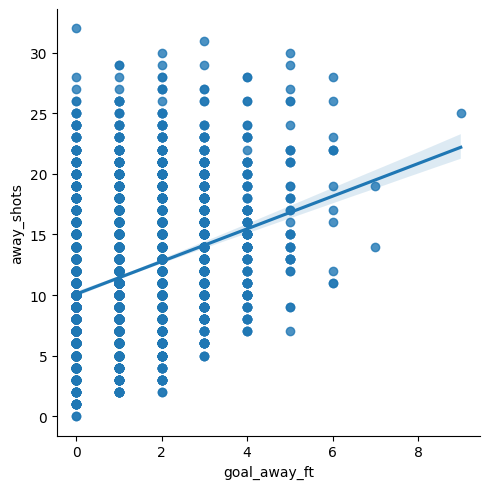

In [49]:
sns.lmplot(data=Total_goles_tiros,x= 'goal_away_ft', y='away_shots')
visitante_goles_tiros.corr("pearson")


,goal_home_ft,home_shots
goal_home_ft,1.00000,0.28688
home_shots,0.28688,1.00000


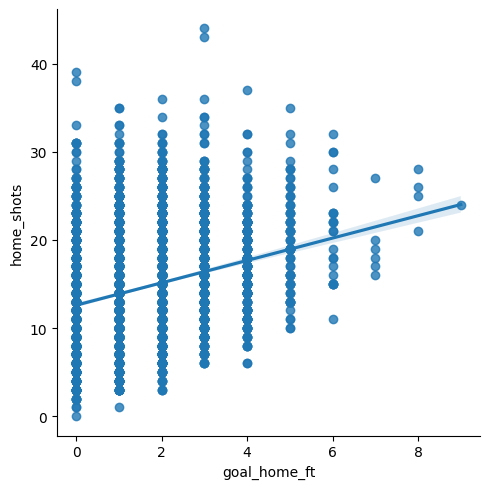

In [50]:
sns.lmplot(data=Total_goles_tiros,x= 'goal_home_ft', y='home_shots')
local_goles_tiros.corr("pearson")


No existe una correlación lineal marcada, sino es una más bien baja, esto significaría que más tiros al arco se traducen en más goles, puede significar que lo importante a la hora de hacer goles es la efectividad y no tanto la cantidad de disparos al arco, lo interesante es que el equipo visitante convierte más con menos tiros al arco.

In [58]:
goles_tiros_al_arco_local= pl[["goal_home_ft","home_shots_on_target"]]
print(goles_tiros_al_arco_local)
goles_tiros_al_arco_visitante= pl[["goal_away_ft","away_shots_on_target"]]
print(goles_tiros_al_arco_visitante)
goles_tiros_al_arco_visitante.corr("pearson")

      goal_home_ft  home_shots_on_target
0                2                   5.0
1                3                   5.0
2                1                   6.0
3                2                   9.0
4                0                   5.0
...            ...                   ...
4065             0                   1.0
4066             1                   7.0
4067             0                   2.0
4068             1                   2.0
4069             0                   2.0

[4070 rows x 2 columns]
      goal_away_ft  away_shots_on_target
0                1                   4.0
1                0                   2.0
2                0                   5.0
3                1                   5.0
4                0                   3.0
...            ...                   ...
4065             1                   4.0
4066             1                   4.0
4067             0                   1.0
4068             0                   4.0
4069             0              

,goal_away_ft,away_shots_on_target
goal_away_ft,1.000000,0.580209
away_shots_on_target,0.580209,1.000000


In [59]:
goles_tiros_al_arco_local.corr("pearson")

,goal_home_ft,home_shots_on_target
goal_home_ft,1.000000,0.575109
home_shots_on_target,0.575109,1.000000


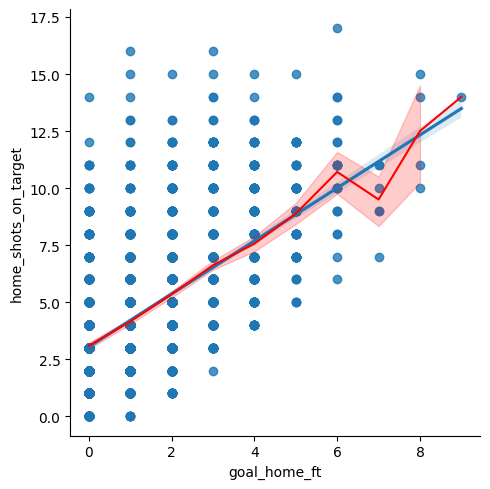

,goal_home_ft,home_shots_on_target
goal_home_ft,1.000000,0.575109
home_shots_on_target,0.575109,1.000000


In [63]:
sns.lmplot(data=pl, x="goal_home_ft", y="home_shots_on_target")
sns.lineplot(data=pl, x="goal_home_ft", y="home_shots_on_target", color='red')
plt.show()
goles_tiros_al_arco_local.corr("pearson")


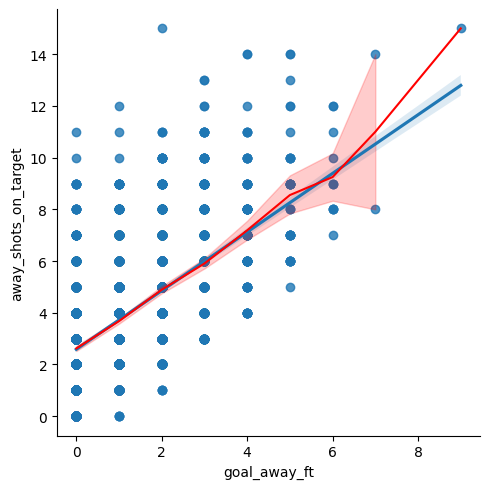

,goal_away_ft,away_shots_on_target
goal_away_ft,1.000000,0.580209
away_shots_on_target,0.580209,1.000000


In [62]:
sns.lmplot(data=pl, x="goal_away_ft", y="away_shots_on_target")
sns.lineplot(data=pl, x="goal_away_ft", y="away_shots_on_target", color='red')
plt.show()
goles_tiros_al_arco_visitante.corr("pearson")

La correlación tiene una tendencia más clara cuando miramos la correlación con los tiros que efectivamente tienen dirección de portería, lo cual puede confirmar la hipótesis de que lo importante es la efectividad y no la cantidad de ocasiones generadas, al menos para los locales. Es interesante como en este apartado practicamente se igualan las correlaciones sin importar si el equipo es local o visitante.

In [13]:
faltas= pl[["date","away_fouls_conceded","home_fouls_conceded","resultado"]]
faltas

,date,away_fouls_conceded,home_fouls_conceded,resultado
0,2010-11-01,13.0,16.0,Victoria_local
1,2011-04-11,3.0,6.0,Victoria_local
2,2010-12-13,17.0,9.0,Victoria_local
3,2010-09-13,14.0,12.0,Victoria_local
4,2011-02-14,13.0,11.0,Empate
...,...,...,...,...
4065,2021-02-03,6.0,12.0,Derrota_local
4066,2021-03-03,12.0,6.0,Empate
4067,2021-03-03,13.0,4.0,Empate
4068,2021-03-03,6.0,13.0,Victoria_local


In [17]:
possession= pl[["season","away_possession","resultado"]]
possession

possession2= possession[possession["resultado"]=="Victoria visitante"]
possession2



,season,away_possession,resultado


In [18]:
df_x=possession2[['season','away_possession']].groupby(by=['season']).mean().reset_index() 
df_x.head()

,season,away_possession


In [19]:
possessionl= pl[["season","home_possession","resultado"]]
possessionl2= possessionl.rename(columns={"season":"temporada"})

possession3= possessionl2[possession["resultado"]=="Victoria local"]
possession3


,temporada,home_possession,resultado


In [20]:
df_h=possession3[['temporada','home_possession']].groupby(by=['temporada']).mean().reset_index() 
df_h.head()

,temporada,home_possession


In [143]:
h= pd.concat([df_h,df_x], axis=1)
h
j= h.drop(columns=["temporada"])
j.index = j['season']
j


,home_possession,season,away_possession
season,,,
10/11,50.797207,10/11,48.877778
11/12,53.491813,11/12,51.592241
12/13,52.581325,12/13,51.256604
13/14,53.165922,13/14,50.448780
14/15,52.428488,14/15,49.266957
15/16,51.501923,15/16,48.705172
16/17,52.644920,16/17,54.206422
17/18,54.068786,17/18,53.377778
18/19,54.340331,18/19,53.094531


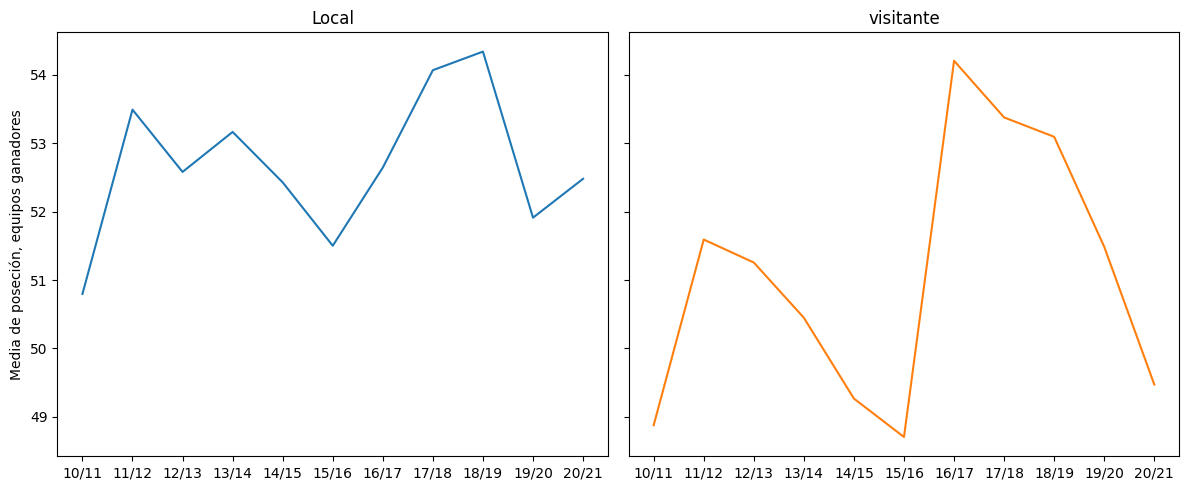

In [160]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), sharex=True, sharey=True)  
ax[0].plot(j.index, j['home_possession'], label='Poseción del local')
ax[1].plot(j.index, j['away_possession'], label='Poseción del visitante', color='C1')
ax[0].set_title('Local') 
ax[1].set_title('visitante') 
ax[0].set_ylabel('Media de poseción, equipos ganadores')
plt.tight_layout()


Los locales suelen necesitar tener más el balón para ganar sus partidos que los visitantes de media, a su vez se puede ver una tendencia a la baja al final del periodo en la importancia relativa de la poseción para ganar los partidos.

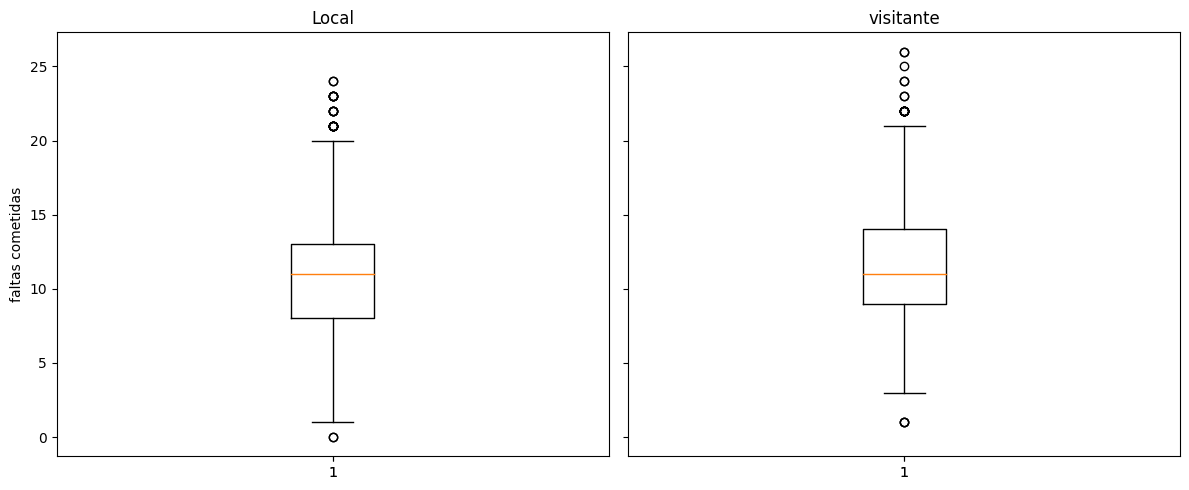

In [166]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), sharex=True, sharey=True)  
ax[0].boxplot(x=pl['home_fouls_conceded'])
ax[1].boxplot(x=pl['away_fouls_conceded'])
ax[0].set_title('Local') 
ax[1].set_title('visitante') 
ax[0].set_ylabel('faltas cometidas')
plt.tight_layout()

In [174]:
pl['away_fouls_conceded'].mean()/pl['away_yellow_cards'].mean()


6.446279824932938

In [173]:
pl['home_fouls_conceded'].mean()/pl['home_yellow_cards'].mean()


7.210552268244576

El visitante suele hacer más faltas que el local, lo que en principio indicaría que le sacan más amarillas o rojas que al local, pero si se mira la cantidad de tarjetas que se le sacan por falta se puede ver que al local le sacan una amarilla cada 7,2 faltas y al visititante cada 6.44, lo que significa que la localía también puede tener efectos en los arbitros y contribuír a la victoria o derrota.

In [80]:
modelo= pl[['home_team','result_full','resultado_parcial','resultado','home_clearances','home_fouls_conceded','home_passes','home_possession','home_red_cards','home_shots','home_shots_on_target','home_tackles','home_touches','home_yellow_cards']]
modelo


,home_team,result_full,resultado_parcial,resultado,home_clearances,home_fouls_conceded,home_passes,home_possession,home_red_cards,home_shots,home_shots_on_target,home_tackles,home_touches,home_yellow_cards
0,Blackpool,2-1,Victoria_local_parcial,Victoria_local,15.0,16.0,550.0,65.4,0.0,26.0,5.0,19.0,740.0,2.0
1,Liverpool,3-0,Victoria_local_parcial,Victoria_local,16.0,6.0,527.0,53.1,0.0,21.0,5.0,31.0,750.0,1.0
2,Manchester United,1-0,Victoria_local_parcial,Victoria_local,26.0,9.0,430.0,46.1,0.0,17.0,6.0,27.0,635.0,0.0
3,Stoke City,2-1,derrota_local_parcial,Victoria_local,26.0,12.0,277.0,43.3,0.0,21.0,9.0,16.0,495.0,1.0
4,Fulham,0-0,Empate_parcial,Empate,50.0,11.0,333.0,37.4,0.0,13.0,5.0,32.0,576.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,Liverpool,0-1,Empate_parcial,Derrota_local,15.0,12.0,697.0,63.4,0.0,11.0,1.0,12.0,886.0,1.0
4066,Burnley,1-1,Empate_parcial,Empate,13.0,6.0,351.0,38.9,0.0,12.0,7.0,8.0,522.0,0.0
4067,Crystal Palace,0-0,Empate_parcial,Empate,25.0,4.0,353.0,37.0,0.0,8.0,2.0,19.0,544.0,1.0
4068,Sheffield United,1-0,Victoria_local_parcial,Victoria_local,47.0,13.0,263.0,28.2,1.0,9.0,2.0,13.0,443.0,1.0


In [23]:
modelo2= pl[['home_team','away_team','resultado','home_clearances','home_fouls_conceded','home_passes','home_possession','home_red_cards','home_shots','home_shots_on_target','home_tackles','home_touches','home_yellow_cards']]
modelo2

,home_team,away_team,resultado,home_clearances,home_fouls_conceded,home_passes,home_possession,home_red_cards,home_shots,home_shots_on_target,home_tackles,home_touches,home_yellow_cards
0,Blackpool,West Bromwich Albion,Victoria_local,15.0,16.0,550.0,65.4,0.0,26.0,5.0,19.0,740.0,2.0
1,Liverpool,Manchester City,Victoria_local,16.0,6.0,527.0,53.1,0.0,21.0,5.0,31.0,750.0,1.0
2,Manchester United,Arsenal,Victoria_local,26.0,9.0,430.0,46.1,0.0,17.0,6.0,27.0,635.0,0.0
3,Stoke City,Aston Villa,Victoria_local,26.0,12.0,277.0,43.3,0.0,21.0,9.0,16.0,495.0,1.0
4,Fulham,Chelsea,Empate,50.0,11.0,333.0,37.4,0.0,13.0,5.0,32.0,576.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,Liverpool,Brighton and Hove Albion,Derrota_local,15.0,12.0,697.0,63.4,0.0,11.0,1.0,12.0,886.0,1.0
4066,Burnley,Leicester City,Empate,13.0,6.0,351.0,38.9,0.0,12.0,7.0,8.0,522.0,0.0
4067,Crystal Palace,Manchester United,Empate,25.0,4.0,353.0,37.0,0.0,8.0,2.0,19.0,544.0,1.0
4068,Sheffield United,Aston Villa,Victoria_local,47.0,13.0,263.0,28.2,1.0,9.0,2.0,13.0,443.0,1.0


In [22]:
resultados3= pd.get_dummies(pl["resultado"], prefix= "resultado")
resultados3

,resultado_Derrota_local,resultado_Empate,resultado_Victoria_local
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
4065,1,0,0
4066,0,1,0
4067,0,1,0
4068,0,0,1


In [21]:
resultados2= pd.get_dummies(pl["resultado_parcial"], prefix= "resultado")
resultados2


,resultado_Empate_parcial,resultado_Victoria_local_parcial,resultado_derrota_local_parcial
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,1,0,0
...,...,...,...
4065,1,0,0
4066,1,0,0
4067,1,0,0
4068,0,1,0


In [23]:
pl2= pd.concat([pl,resultados3], axis= 1)
pl2

,Unnamed: 0,link_match,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,...,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away,resultado_parcial,resultado,resultado_Derrota_local,resultado_Empate,resultado_Victoria_local
0,0,https://www.premierleague.com/match/7186,10/11,2010-11-01,Blackpool,West Bromwich Albion,2-1,1-0,15.0,8.0,...,-2.0,0.33,0.78,-4.0,55.6,Victoria_local_parcial,Victoria_local,0,0,1
1,1,https://www.premierleague.com/match/7404,10/11,2011-04-11,Liverpool,Manchester City,3-0,3-0,16.0,6.0,...,23.0,0.87,0.32,17.0,60.2,Victoria_local_parcial,Victoria_local,0,0,1
2,2,https://www.premierleague.com/match/7255,10/11,2010-12-13,Manchester United,Arsenal,1-0,1-0,26.0,5.0,...,16.0,0.94,0.38,9.0,66.7,Victoria_local_parcial,Victoria_local,0,0,1
3,3,https://www.premierleague.com/match/7126,10/11,2010-09-13,Stoke City,Aston Villa,2-1,0-1,26.0,8.0,...,-2.0,1.00,1.00,0.0,66.7,derrota_local_parcial,Victoria_local,0,0,1
4,4,https://www.premierleague.com/match/7350,10/11,2011-02-14,Fulham,Chelsea,0-0,0-0,50.0,4.0,...,24.0,0.84,0.48,9.0,58.7,Empate_parcial,Empate,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,4065,https://www.premierleague.com/match/59113,20/21,2021-02-03,Liverpool,Brighton and Hove Albion,0-1,0-0,15.0,5.0,...,-6.0,0.52,0.67,-3.0,33.3,Empate_parcial,Derrota_local,1,0,0
4066,4066,https://www.premierleague.com/match/59177,20/21,2021-03-03,Burnley,Leicester City,1-1,1-1,13.0,5.0,...,15.0,0.77,0.58,5.0,62.8,Empate_parcial,Empate,0,1,0
4067,4067,https://www.premierleague.com/match/59178,20/21,2021-03-03,Crystal Palace,Manchester United,0-0,0-0,25.0,4.0,...,21.0,0.85,0.69,4.0,64.1,Empate_parcial,Empate,0,1,0
4068,4068,https://www.premierleague.com/match/59182,20/21,2021-03-03,Sheffield United,Aston Villa,1-0,1-0,47.0,2.0,...,12.0,0.67,0.42,6.0,54.2,Victoria_local_parcial,Victoria_local,0,0,1


In [24]:
pl3= pd.concat([pl2,resultados2], axis= 1)
pl3

,Unnamed: 0,link_match,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,...,sg_match_ht_acum_away,performance_acum_away,resultado_parcial,resultado,resultado_Derrota_local,resultado_Empate,resultado_Victoria_local,resultado_Empate_parcial,resultado_Victoria_local_parcial,resultado_derrota_local_parcial
0,0,https://www.premierleague.com/match/7186,10/11,2010-11-01,Blackpool,West Bromwich Albion,2-1,1-0,15.0,8.0,...,-4.0,55.6,Victoria_local_parcial,Victoria_local,0,0,1,0,1,0
1,1,https://www.premierleague.com/match/7404,10/11,2011-04-11,Liverpool,Manchester City,3-0,3-0,16.0,6.0,...,17.0,60.2,Victoria_local_parcial,Victoria_local,0,0,1,0,1,0
2,2,https://www.premierleague.com/match/7255,10/11,2010-12-13,Manchester United,Arsenal,1-0,1-0,26.0,5.0,...,9.0,66.7,Victoria_local_parcial,Victoria_local,0,0,1,0,1,0
3,3,https://www.premierleague.com/match/7126,10/11,2010-09-13,Stoke City,Aston Villa,2-1,0-1,26.0,8.0,...,0.0,66.7,derrota_local_parcial,Victoria_local,0,0,1,0,0,1
4,4,https://www.premierleague.com/match/7350,10/11,2011-02-14,Fulham,Chelsea,0-0,0-0,50.0,4.0,...,9.0,58.7,Empate_parcial,Empate,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,4065,https://www.premierleague.com/match/59113,20/21,2021-02-03,Liverpool,Brighton and Hove Albion,0-1,0-0,15.0,5.0,...,-3.0,33.3,Empate_parcial,Derrota_local,1,0,0,1,0,0
4066,4066,https://www.premierleague.com/match/59177,20/21,2021-03-03,Burnley,Leicester City,1-1,1-1,13.0,5.0,...,5.0,62.8,Empate_parcial,Empate,0,1,0,1,0,0
4067,4067,https://www.premierleague.com/match/59178,20/21,2021-03-03,Crystal Palace,Manchester United,0-0,0-0,25.0,4.0,...,4.0,64.1,Empate_parcial,Empate,0,1,0,1,0,0
4068,4068,https://www.premierleague.com/match/59182,20/21,2021-03-03,Sheffield United,Aston Villa,1-0,1-0,47.0,2.0,...,6.0,54.2,Victoria_local_parcial,Victoria_local,0,0,1,0,1,0


In [25]:
model2= 'resultado_Victoria_local~resultado_Victoria_local_parcial+ home_possession + home_passes + home_shots_on_target +home_shots'
lm1= sm.ols(formula= model2, data= pl3).fit()
print(lm1.summary())

                               OLS Regression Results                               
Dep. Variable:     resultado_Victoria_local   R-squared:                       0.343
Model:                                  OLS   Adj. R-squared:                  0.342
Method:                       Least Squares   F-statistic:                     423.6
Date:                      Sun, 14 May 2023   Prob (F-statistic):               0.00
Time:                              21:13:52   Log-Likelihood:                -2080.6
No. Observations:                      4070   AIC:                             4173.
Df Residuals:                          4064   BIC:                             4211.
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

el resultado sorprendente es que ni siquiera el hecho de irte ganando al descanso es totalmente condicionante de la victoria final aunque es la variable más relevante de las seleccionadas, lo cuál hace sentido con las primeras gráficas, que marcaban que los locales ganaban más partidos independientemente del resultado con el cuál se van al descanso.Incorporando otras estadisticas que parecen importantes en la victoria parece que tampoco son capaces de explicar con fuera la victoria, lo que indicaría que la regresión lineal no es un buen modelo para explicar los resultados en principio, seguramente es por la globalidad de la estadisticas, que toma equipos con distintos estilos de juego.

In [26]:
man= pl3[pl3["home_team"]=="Manchester City"].tail(20)
man

,Unnamed: 0,link_match,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,...,sg_match_ht_acum_away,performance_acum_away,resultado_parcial,resultado,resultado_Derrota_local,resultado_Empate,resultado_Victoria_local,resultado_Empate_parcial,resultado_Victoria_local_parcial,resultado_derrota_local_parcial
3761,3761,https://www.premierleague.com/match/46809,19/20,2020-01-01,Manchester City,Everton,2-1,0-0,13.0,3.0,...,4.0,41.7,Empate_parcial,Victoria_local,0,0,1,1,0,0
3773,3773,https://www.premierleague.com/match/46961,19/20,2020-07-15,Manchester City,AFC Bournemouth,2-1,2-0,25.0,3.0,...,-13.0,29.5,Victoria_local_parcial,Victoria_local,0,0,1,0,1,0
3776,3776,https://www.premierleague.com/match/46879,19/20,2020-06-17,Manchester City,Arsenal,3-0,1-0,6.0,5.0,...,-3.0,47.6,Victoria_local_parcial,Victoria_local,0,0,1,0,1,0
3777,3777,https://www.premierleague.com/match/46860,19/20,2020-02-19,Manchester City,West Ham United,2-0,1-0,12.0,6.0,...,-2.0,32.0,Victoria_local_parcial,Victoria_local,0,0,1,0,1,0
3796,3796,https://www.premierleague.com/match/46941,19/20,2020-07-08,Manchester City,Newcastle United,5-0,2-0,11.0,8.0,...,-5.0,43.4,Victoria_local_parcial,Victoria_local,0,0,1,0,1,0
3847,3847,https://www.premierleague.com/match/59132,20/21,2021-02-13,Manchester City,Tottenham Hotspur,3-0,1-0,7.0,4.0,...,13.0,55.6,Victoria_local_parcial,Victoria_local,0,0,1,0,1,0
3855,3855,https://www.premierleague.com/match/58941,20/21,2020-10-17,Manchester City,Arsenal,1-0,1-0,9.0,6.0,...,0.0,75.0,Victoria_local_parcial,Victoria_local,0,0,1,0,1,0
3886,3886,https://www.premierleague.com/match/59042,20/21,2020-12-26,Manchester City,Newcastle United,2-0,1-0,15.0,7.0,...,-4.0,46.2,Victoria_local_parcial,Victoria_local,0,0,1,0,1,0
3893,3893,https://www.premierleague.com/match/59151,20/21,2021-02-27,Manchester City,West Ham United,2-1,1-1,10.0,4.0,...,4.0,60.0,Empate_parcial,Victoria_local,0,0,1,1,0,0
3898,3898,https://www.premierleague.com/match/58992,20/21,2020-11-28,Manchester City,Burnley,5-0,3-0,20.0,6.0,...,-2.0,20.8,Victoria_local_parcial,Victoria_local,0,0,1,0,1,0


In [27]:
model4= 'resultado_Victoria_local~resultado_Victoria_local_parcial+ home_possession + home_passes + home_shots_on_target'
lm1= sm.ols(formula= model4, data= man).fit()
print(lm1.summary())

                               OLS Regression Results                               
Dep. Variable:     resultado_Victoria_local   R-squared:                       0.517
Model:                                  OLS   Adj. R-squared:                  0.389
Method:                       Least Squares   F-statistic:                     4.020
Date:                      Sun, 14 May 2023   Prob (F-statistic):             0.0207
Time:                              21:13:59   Log-Likelihood:                -2.7675
No. Observations:                        20   AIC:                             15.54
Df Residuals:                            15   BIC:                             20.51
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

Eligiendo un solo equipo y los ultimos partidos, con variables que se saben importantes para dicho equipor el modelo ajusta mejor pero sigue sin ser un ajuste que sirva para dar una predicción con fuerza.

In [28]:
man2= pl3[(pl3["home_team"]=="Manchester City")&(pl3["away_team"]=="Everton")].tail(20)
man2

,Unnamed: 0,link_match,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,...,sg_match_ht_acum_away,performance_acum_away,resultado_parcial,resultado,resultado_Derrota_local,resultado_Empate,resultado_Victoria_local,resultado_Empate_parcial,resultado_Victoria_local_parcial,resultado_derrota_local_parcial
7,7,https://www.premierleague.com/match/7258,10/11,2010-12-20,Manchester City,Everton,1-2,0-2,9.0,10.0,...,-4.0,35.3,derrota_local_parcial,Derrota_local,1,0,0,0,0,1
532,532,https://www.premierleague.com/match/7519,11/12,2011-09-24,Manchester City,Everton,2-0,0-0,14.0,7.0,...,0.0,58.3,Empate_parcial,Victoria_local,0,0,1,1,0,0
780,780,https://www.premierleague.com/match/8006,12/13,2012-12-01,Manchester City,Everton,1-1,1-1,31.0,5.0,...,7.0,52.4,Empate_parcial,Empate,0,1,0,1,0,0
1344,1344,https://www.premierleague.com/match/9295,13/14,2013-10-05,Manchester City,Everton,3-1,2-1,14.0,8.0,...,3.0,66.7,Victoria_local_parcial,Victoria_local,0,0,1,0,1,0
1738,1738,https://www.premierleague.com/match/9753,14/15,2014-12-06,Manchester City,Everton,1-0,1-0,27.0,11.0,...,5.0,42.9,Victoria_local_parcial,Victoria_local,0,0,1,0,1,0
2263,2263,https://www.premierleague.com/match/12320,15/16,2016-01-13,Manchester City,Everton,0-0,0-0,15.0,12.0,...,4.0,45.0,Empate_parcial,Empate,0,1,0,1,0,0
2384,2384,https://www.premierleague.com/match/14115,16/17,2016-10-15,Manchester City,Everton,1-1,0-0,13.0,13.0,...,3.0,66.7,Empate_parcial,Empate,0,1,0,1,0,0
2678,2678,https://www.premierleague.com/match/22357,17/18,2017-08-21,Manchester City,Everton,1-1,0-1,6.0,7.0,...,1.0,100.0,derrota_local_parcial,Empate,0,1,0,0,0,1
3107,3107,https://www.premierleague.com/match/38473,18/19,2018-12-15,Manchester City,Everton,3-1,1-0,14.0,6.0,...,1.0,50.0,Victoria_local_parcial,Victoria_local,0,0,1,0,1,0
3761,3761,https://www.premierleague.com/match/46809,19/20,2020-01-01,Manchester City,Everton,2-1,0-0,13.0,3.0,...,4.0,41.7,Empate_parcial,Victoria_local,0,0,1,1,0,0


In [29]:
man2.shape

(10, 122)

In [30]:
model4= 'resultado_Victoria_local~resultado_Victoria_local_parcial+ home_possession + away_possession + away_passes + home_passes + home_shots_on_target + away_shots_on_target + away_red_cards + away_yellow_cards '
lm1= sm.ols(formula= model4, data= man2).fit()
print(lm1.summary())

                               OLS Regression Results                               
Dep. Variable:     resultado_Victoria_local   R-squared:                       1.000
Model:                                  OLS   Adj. R-squared:                  1.000
Method:                       Least Squares   F-statistic:                     9376.
Date:                      Sun, 14 May 2023   Prob (F-statistic):            0.00799
Time:                              21:14:05   Log-Likelihood:                 48.869
No. Observations:                        10   AIC:                            -79.74
Df Residuals:                             1   BIC:                            -77.01
Df Model:                                 8                                         
Covariance Type:                  nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

C:\Users\UruGlobal\miniconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [31]:
model4= 'resultado_Victoria_local~+ home_possession + away_possession + away_passes + home_passes + home_shots_on_target + away_shots_on_target + away_red_cards + away_yellow_cards '
lm1= sm.ols(formula= model4, data= man2).fit()
print(lm1.summary())

                               OLS Regression Results                               
Dep. Variable:     resultado_Victoria_local   R-squared:                       0.990
Model:                                  OLS   Adj. R-squared:                  0.953
Method:                       Least Squares   F-statistic:                     27.21
Date:                      Sun, 14 May 2023   Prob (F-statistic):             0.0359
Time:                              21:14:08   Log-Likelihood:                 15.576
No. Observations:                        10   AIC:                            -15.15
Df Residuals:                             2   BIC:                            -12.73
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

C:\Users\UruGlobal\miniconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Ajustando aún más el modelo, seleccionando los ultimos partidos y sumando valores de ambos equipos el modelo adjusta aún mejor, consiguiendo un "R" con mucha más fuerza. Entonces, al menos para uno de los resultados posibles se puede entender que es importante las variables de ambos equipos, no alcanza con evaluar uno solo. No es totalmente relevante irse ganando en el primer tiempo para que el resultado final sea positivo en el caso de estos dos equipos, cuando en este caso el Manchester City juega de local, el aspecto de como terminó el primer tiempo no fue relevante en el desarrollo final del encuentro, por lo cuál al menos para este analisis podría quitarse del modelo.

In [32]:
man5= man2[['resultado_Victoria_local', 'home_possession', 'away_possession', 'away_passes','home_passes','home_shots_on_target','away_shots_on_target','away_red_cards', 'away_yellow_cards']]
man5

,resultado_Victoria_local,home_possession,away_possession,away_passes,home_passes,home_shots_on_target,away_shots_on_target,away_red_cards,away_yellow_cards
7,0,68.2,31.8,286.0,615.0,7.0,2.0,1.0,1.0
532,1,62.7,37.3,322.0,567.0,7.0,3.0,0.0,5.0
780,0,59.2,40.8,380.0,546.0,4.0,4.0,0.0,1.0
1344,1,53.9,46.1,417.0,491.0,6.0,4.0,0.0,4.0
1738,1,51.3,48.7,467.0,485.0,3.0,2.0,0.0,3.0
2263,0,55.0,45.0,468.0,544.0,5.0,2.0,0.0,1.0
2384,0,72.6,27.4,255.0,661.0,8.0,2.0,0.0,2.0
2678,0,65.4,34.6,301.0,560.0,6.0,2.0,1.0,2.0
3107,1,67.0,33.0,335.0,705.0,5.0,2.0,0.0,2.0
3761,1,65.4,34.6,401.0,777.0,7.0,2.0,0.0,4.0


In [33]:
man6= man5.set_index("resultado_Victoria_local")

In [34]:
man6.shape

(10, 8)

Porcentaje de varianza explicada por cada componente
[5.38775091e-01 1.86366492e-01 1.33012829e-01 8.37999246e-02
 2.92804968e-02 2.85877268e-02 1.77440842e-04 6.69484263e-33]


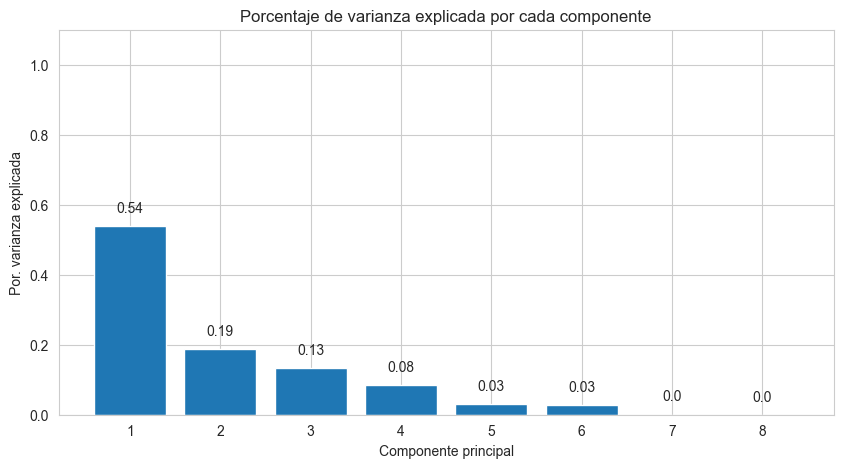

In [35]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import statsmodels.api as sm


datos = man6

# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

# Porcentaje de varianza explicada por cada componente
print('Porcentaje de varianza explicada por cada componente')
print(modelo_pca.explained_variance_ratio_)

import seaborn as sns;sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.bar(x= np.arange(modelo_pca.n_components_) + 1,height = modelo_pca.explained_variance_ratio_)
for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1);ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

In [93]:
model4= 'resultado_Victoria_local~ home_possession + away_possession + away_passes + home_passes + home_shots_on_target + away_shots_on_target'
lm1= sm.ols(formula= model4, data= man2).fit()
print(lm1.summary())

                               OLS Regression Results                               
Dep. Variable:     resultado_Victoria_local   R-squared:                       0.920
Model:                                  OLS   Adj. R-squared:                  0.820
Method:                       Least Squares   F-statistic:                     9.209
Date:                      Sat, 13 May 2023   Prob (F-statistic):             0.0257
Time:                              14:22:22   Log-Likelihood:                 5.3752
No. Observations:                        10   AIC:                             1.250
Df Residuals:                             4   BIC:                             3.065
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

C:\Users\UruGlobal\miniconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Aparentemente en mi modelo podría eliminar el efecto de las tarjetas del equipo visitante dado que no es relevante en el resultado final, probando nuevamente la regresión sigue dando un adjuste por encima del 0.9. Además es parece ser que la variable posección tiene importancia relativa aunque sea en el hecho de que el equipo local gane el partido, lo cuál con un poco más de analisis por equipo hace coherencia con el Manchester City.

In [ ]:
#Probar un modelo distinto(clasificación), el model es capaz de predecir si ganó el local el partido?

In [36]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree


In [71]:
man_mant= pl3[(pl3["home_team"]=="Manchester City")].head(110)
man_mant

,Unnamed: 0,link_match,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,...,sg_match_ht_acum_away,performance_acum_away,resultado_parcial,resultado,resultado_Derrota_local,resultado_Empate,resultado_Victoria_local,resultado_Empate_parcial,resultado_Victoria_local_parcial,resultado_derrota_local_parcial
7,7,https://www.premierleague.com/match/7258,10/11,2010-12-20,Manchester City,Everton,1-2,0-2,9.0,10.0,...,-4.0,35.3,derrota_local_parcial,Derrota_local,1,0,0,0,0,1
9,9,https://www.premierleague.com/match/7106,10/11,2010-08-23,Manchester City,Liverpool,3-0,1-0,24.0,5.0,...,0.0,33.3,Victoria_local_parcial,Victoria_local,0,0,1,0,1,0
19,19,https://www.premierleague.com/match/7279,10/11,2011-01-01,Manchester City,Blackpool,1-0,1-0,20.0,10.0,...,0.0,49.0,Victoria_local_parcial,Victoria_local,0,0,1,0,1,0
34,34,https://www.premierleague.com/match/7120,10/11,2010-09-11,Manchester City,Blackburn Rovers,1-1,0-1,38.0,13.0,...,1.0,33.3,derrota_local_parcial,Empate,0,1,0,0,0,1
48,48,https://www.premierleague.com/match/7208,10/11,2010-11-13,Manchester City,Birmingham City,0-0,0-0,28.0,6.0,...,1.0,33.3,Empate_parcial,Empate,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,2095,https://www.premierleague.com/match/12217,15/16,2015-10-31,Manchester City,Norwich City,2-1,0-0,27.0,12.0,...,-1.0,30.0,Empate_parcial,Victoria_local,0,0,1,1,0,0
2110,2110,https://www.premierleague.com/match/12395,15/16,2016-03-05,Manchester City,Aston Villa,4-0,0-0,4.0,9.0,...,-16.0,19.0,Empate_parcial,Victoria_local,0,0,1,1,0,0
2118,2118,https://www.premierleague.com/match/12357,15/16,2016-02-06,Manchester City,Leicester City,1-3,0-1,29.0,11.0,...,4.0,69.4,derrota_local_parcial,Derrota_local,1,0,0,0,0,1
2146,2146,https://www.premierleague.com/match/12430,15/16,2016-04-09,Manchester City,West Bromwich Albion,2-1,1-1,27.0,8.0,...,-1.0,43.0,Empate_parcial,Victoria_local,0,0,1,1,0,0


In [72]:
man_mant2= man_mant[['resultado_Victoria_local', 'home_possession', 'away_possession', 'away_passes','home_passes','home_shots_on_target','away_shots_on_target','away_red_cards', 'away_yellow_cards']]
man_mant2

,resultado_Victoria_local,home_possession,away_possession,away_passes,home_passes,home_shots_on_target,away_shots_on_target,away_red_cards,away_yellow_cards
7,0,68.2,31.8,286.0,615.0,7.0,2.0,1.0,1.0
9,1,54.4,45.6,400.0,492.0,3.0,5.0,0.0,1.0
19,1,52.2,47.8,417.0,459.0,3.0,6.0,0.0,0.0
34,0,64.9,35.1,282.0,512.0,10.0,3.0,0.0,1.0
48,0,59.5,40.5,339.0,499.0,7.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2095,1,70.8,29.2,296.0,722.0,5.0,3.0,1.0,2.0
2110,1,71.2,28.8,328.0,811.0,9.0,1.0,0.0,1.0
2118,0,65.9,34.1,296.0,565.0,4.0,7.0,0.0,2.0
2146,1,62.1,37.9,316.0,548.0,4.0,2.0,0.0,1.0


In [73]:
model= DecisionTreeClassifier()

In [74]:
explicativas= man_mant2.drop(columns='resultado_Victoria_local')
explicativas

,home_possession,away_possession,away_passes,home_passes,home_shots_on_target,away_shots_on_target,away_red_cards,away_yellow_cards
7,68.2,31.8,286.0,615.0,7.0,2.0,1.0,1.0
9,54.4,45.6,400.0,492.0,3.0,5.0,0.0,1.0
19,52.2,47.8,417.0,459.0,3.0,6.0,0.0,0.0
34,64.9,35.1,282.0,512.0,10.0,3.0,0.0,1.0
48,59.5,40.5,339.0,499.0,7.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2095,70.8,29.2,296.0,722.0,5.0,3.0,1.0,2.0
2110,71.2,28.8,328.0,811.0,9.0,1.0,0.0,1.0
2118,65.9,34.1,296.0,565.0,4.0,7.0,0.0,2.0
2146,62.1,37.9,316.0,548.0,4.0,2.0,0.0,1.0


In [75]:
objetivo= man_mant2.resultado_Victoria_local
objetivo

7       0
9       1
19      1
34      0
48      0
       ..
2095    1
2110    1
2118    0
2146    1
2167    0
Name: resultado_Victoria_local, Length: 110, dtype: uint8

In [76]:
from sklearn.tree import DecisionTreeClassifier 

In [77]:
model.fit(X= explicativas, y= objetivo)

DecisionTreeClassifier()

In [78]:
from sklearn.tree import plot_tree

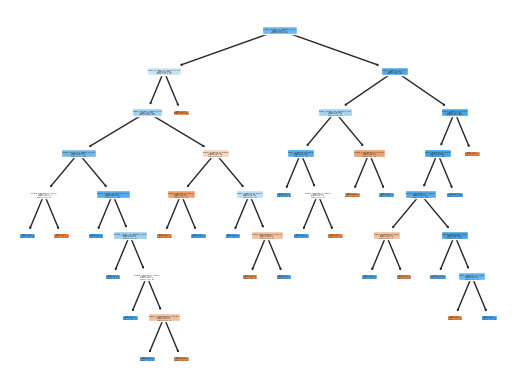

In [79]:
plot_tree(decision_tree=model, feature_names=explicativas.columns, filled=True);

In [80]:
b= explicativas.sample(7)
b

,home_possession,away_possession,away_passes,home_passes,home_shots_on_target,away_shots_on_target,away_red_cards,away_yellow_cards
1518,73.3,26.7,257.0,739.0,9.0,0.0,0.0,2.0
236,59.8,40.2,372.0,555.0,9.0,3.0,0.0,1.0
740,64.9,35.1,383.0,721.0,7.0,1.0,0.0,0.0
973,60.5,39.5,339.0,529.0,9.0,4.0,0.0,3.0
601,46.9,53.1,572.0,507.0,4.0,5.0,0.0,3.0
596,64.1,35.9,294.0,527.0,7.0,3.0,0.0,1.0
1344,53.9,46.1,417.0,491.0,6.0,4.0,0.0,4.0


In [81]:
model.predict(b)

array([1, 1, 1, 1, 1, 0, 1], dtype=uint8)

In [ ]:
#Está correcta la predicción

In [82]:
predi= model.predict(explicativas)
predi

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0],
      dtype=uint8)

In [83]:
man_mant2["pred"]= predi

C:\Users\UruGlobal\AppData\Local\Temp\ipykernel_13112\1875851579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  man_mant2["pred"]= predi


In [84]:
man_mant2.sample(12)[["resultado_Victoria_local", "pred"]]

,resultado_Victoria_local,pred
1769,1,1
2110,1,1
19,1,1
200,1,1
1144,1,1
2046,1,1
1710,0,0
538,1,1
1329,1,1
385,1,1


In [86]:
man_mant7= pl3[(pl3["home_team"]=="Manchester City")].tail(10)
man_mant7

,Unnamed: 0,link_match,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,...,sg_match_ht_acum_away,performance_acum_away,resultado_parcial,resultado,resultado_Derrota_local,resultado_Empate,resultado_Victoria_local,resultado_Empate_parcial,resultado_Victoria_local_parcial,resultado_derrota_local_parcial
3907,3907,https://www.premierleague.com/match/59102,20/21,2021-01-30,Manchester City,Sheffield United,1-0,1-0,6.0,10.0,...,-11.0,13.3,Victoria_local_parcial,Victoria_local,0,0,1,0,1,0
3915,3915,https://www.premierleague.com/match/59001,20/21,2020-12-05,Manchester City,Fulham,2-0,2-0,7.0,9.0,...,-3.0,23.3,Victoria_local_parcial,Victoria_local,0,0,1,0,1,0
3945,3945,https://www.premierleague.com/match/59082,20/21,2021-01-17,Manchester City,Crystal Palace,4-0,1-0,4.0,11.0,...,1.0,43.1,Victoria_local_parcial,Victoria_local,0,0,1,0,1,0
3974,3974,https://www.premierleague.com/match/58921,20/21,2020-09-27,Manchester City,Leicester City,2-5,1-1,7.0,3.0,...,0.0,100.0,Empate_parcial,Derrota_local,1,0,0,1,0,0
4007,4007,https://www.premierleague.com/match/59161,20/21,2021-03-07,Manchester City,Manchester United,0-2,0-1,7.0,6.0,...,4.0,63.0,derrota_local_parcial,Derrota_local,1,0,0,0,0,1
4011,4011,https://www.premierleague.com/match/58972,20/21,2020-11-08,Manchester City,Liverpool,1-1,1-1,20.0,1.0,...,-1.0,76.2,Empate_parcial,Empate,0,1,0,1,0,0
4025,4025,https://www.premierleague.com/match/59025,20/21,2020-12-15,Manchester City,West Bromwich Albion,1-1,1-1,10.0,13.0,...,-2.0,16.7,Empate_parcial,Empate,0,1,0,1,0,0
4033,4033,https://www.premierleague.com/match/59181,20/21,2021-03-02,Manchester City,Wolverhampton Wanderers,4-1,1-0,2.0,10.0,...,0.0,43.6,Victoria_local_parcial,Victoria_local,0,0,1,0,1,0
4044,4044,https://www.premierleague.com/match/59075,20/21,2021-01-13,Manchester City,Brighton and Hove Albion,1-0,1-0,13.0,8.0,...,-4.0,27.5,Victoria_local_parcial,Victoria_local,0,0,1,0,1,0
4055,4055,https://www.premierleague.com/match/58900,20/21,2021-01-20,Manchester City,Aston Villa,2-0,0-0,11.0,16.0,...,2.0,57.8,Empate_parcial,Victoria_local,0,0,1,1,0,0


In [87]:
man_mant8= man_mant7[['resultado_Victoria_local', 'home_possession', 'away_possession', 'away_passes','home_passes','home_shots_on_target','away_shots_on_target','away_red_cards', 'away_yellow_cards']]
man_mant8

,resultado_Victoria_local,home_possession,away_possession,away_passes,home_passes,home_shots_on_target,away_shots_on_target,away_red_cards,away_yellow_cards
3907,1,75.0,25.0,273.0,805.0,5.0,1.0,0.0,3.0
3915,1,68.9,31.1,351.0,793.0,5.0,1.0,0.0,0.0
3945,1,72.2,27.8,288.0,747.0,6.0,0.0,0.0,0.0
3974,0,71.7,28.3,267.0,680.0,5.0,7.0,0.0,3.0
4007,0,65.9,34.1,374.0,715.0,6.0,6.0,0.0,3.0
4011,0,54.6,45.4,459.0,555.0,2.0,3.0,0.0,1.0
4025,0,77.2,22.8,224.0,752.0,7.0,1.0,0.0,3.0
4033,1,72.1,27.9,309.0,798.0,10.0,1.0,0.0,1.0
4044,1,65.1,34.9,384.0,726.0,6.0,1.0,0.0,2.0
4055,1,69.1,30.9,285.0,628.0,9.0,4.0,0.0,2.0


In [88]:
explicativas2= man_mant8.drop(columns='resultado_Victoria_local')
explicativas2

,home_possession,away_possession,away_passes,home_passes,home_shots_on_target,away_shots_on_target,away_red_cards,away_yellow_cards
3907,75.0,25.0,273.0,805.0,5.0,1.0,0.0,3.0
3915,68.9,31.1,351.0,793.0,5.0,1.0,0.0,0.0
3945,72.2,27.8,288.0,747.0,6.0,0.0,0.0,0.0
3974,71.7,28.3,267.0,680.0,5.0,7.0,0.0,3.0
4007,65.9,34.1,374.0,715.0,6.0,6.0,0.0,3.0
4011,54.6,45.4,459.0,555.0,2.0,3.0,0.0,1.0
4025,77.2,22.8,224.0,752.0,7.0,1.0,0.0,3.0
4033,72.1,27.9,309.0,798.0,10.0,1.0,0.0,1.0
4044,65.1,34.9,384.0,726.0,6.0,1.0,0.0,2.0
4055,69.1,30.9,285.0,628.0,9.0,4.0,0.0,2.0


In [89]:
model.predict(explicativas2)

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0], dtype=uint8)

In [112]:
j= model.predict(explicativas2)
j

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0], dtype=uint8)

In [109]:
i=man_mant8['resultado_Victoria_local']
i

3907    1
3915    1
3945    1
3974    0
4007    0
4011    0
4025    0
4033    1
4044    1
4055    1
Name: resultado_Victoria_local, dtype: uint8

En principio un modelo de clasificación parecería ser mejor que uno de regresión si lo que se quiere es tener una predicción del resultado(victoria, empate, derrota) aunque la regresión lineal ayuda a conocer las variables importantes. No sirve de demasiado un modelo que luego de terminado el partido expliqué el resultado pero se podría intenar colocando la mediana o media de las estadisticas de dos equipos y con ello hacer una predicción, de todas formas el modelo predijo correctamente el resultado de victoria o no victoria en 6 de los 10 datos que se tomo por fuera de los datos que se usaron para entrenar el modelo por lo cual tiene un overfitting, dado que para las variables con las que se entrenó si precijo correctamente. Es posible que el modelo mejore teniendo en cuenta más variables, como posiciones de los equipos, aislar mejor la selección de partidos para entrenar el modelo, en 10 temporadas cambias muchas cosas en un equipo, etc.